In [1]:
import xarray as xr
import numpy as np
import zarr as zr
import dask

In [3]:

dir = '/Volumes/Salmacis/mur/atlantic/'
ds = xr.open_mfdataset(dir+'2003*.nc4', combine='by_coords', parallel=True, engine='h5netcdf')
ds

<xarray.Dataset>
Dimensions:           (time: 365, lat: 1001, lon: 1001)
Coordinates:
  * time              (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-12-3...
  * lat               (lat) float32 30.0 30.01 30.02 30.03 ... 39.98 39.99 40.0
  * lon               (lon) float32 -60.0 -59.99 -59.98 ... -50.02 -50.01 -50.0
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 1001, 1001), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 1001, 1001), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 1001, 1001), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 1001, 1001), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                         CF-1.5
    title:                               Daily MUR SST, Final product
    summary:                             A merged, multi-sensor L4 Foundation...
    references:                          http://podaac.jpl.nasa.gov/Multi-sca...
    institution:                         Jet Propulsion Laboratory
    history:                             created at nominal 4-day latency; re...
    ...                                  ...
    build_dmrpp_metadata.build_dmrpp:    3.20.13-664
    build_dmrpp_metadata.bes:            3.20.13-664
    build_dmrpp_metadata.libdap:         libdap-3.20.11-198
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    build_dmrpp_metadata.invocation:     build_dmrpp -c /tmp/bes_conf_pSgJ -f...
    history_json:                        [{"$schema":"https:\/\/harmony.earth...

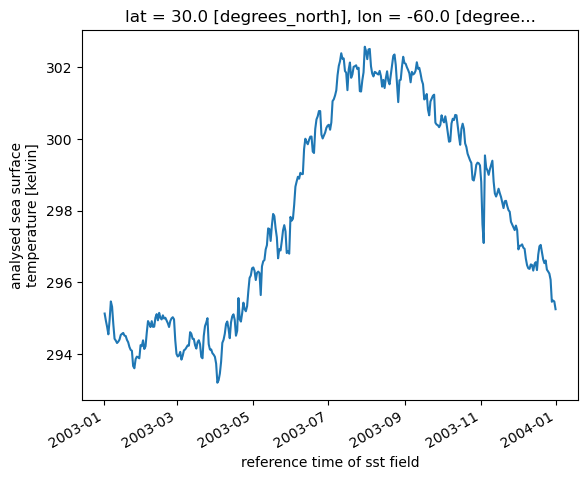

In [4]:
ds["analysed_sst"].isel(lat=0, lon=0).plot()

In [5]:
ds.to_zarr('/Volumes/Salmacis/mur/atlantic_mur_2003.zarr', mode='w', consolidated=True)

In [9]:
ds2003 = xr.open_zarr('/Volumes/Salmacis/atlantic_mur_2003.zarr',chunks = {'time':25})
ds2003

<xarray.Dataset>
Dimensions:           (time: 365, lat: 1001, lon: 1001)
Coordinates:
  * lat               (lat) float32 30.0 30.01 30.02 30.03 ... 39.98 39.99 40.0
  * lon               (lon) float32 -60.0 -59.99 -59.98 ... -50.02 -50.01 -50.0
  * time              (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-12-3...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                         CF-1.5
    Metadata_Conventions:                Unidata Observation Dataset v1.0
    acknowledgment:                      Please acknowledge the use of these ...
    build_dmrpp_metadata.bes:            3.20.13-664
    build_dmrpp_metadata.build_dmrpp:    3.20.13-664
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    ...                                  ...
    summary:                             A merged, multi-sensor L4 Foundation...
    time_coverage_end:                   20030101T210000Z
    time_coverage_start:                 20021231T210000Z
    title:                               Daily MUR SST, Final product
    uuid:                                27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:               -180.0

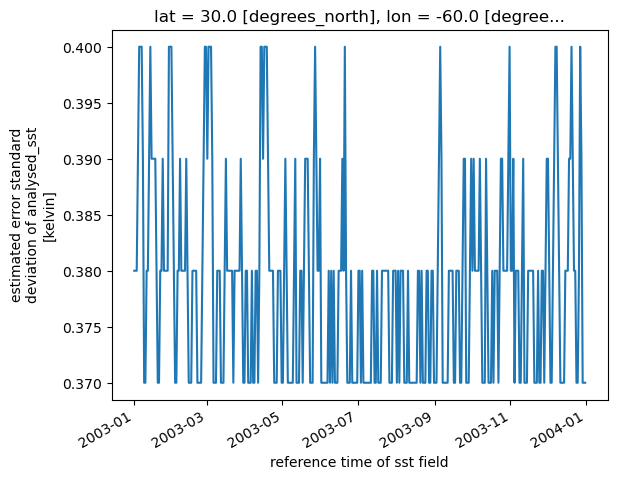

In [7]:
ds["analysis_error"].isel(lat=0, lon=0).plot()

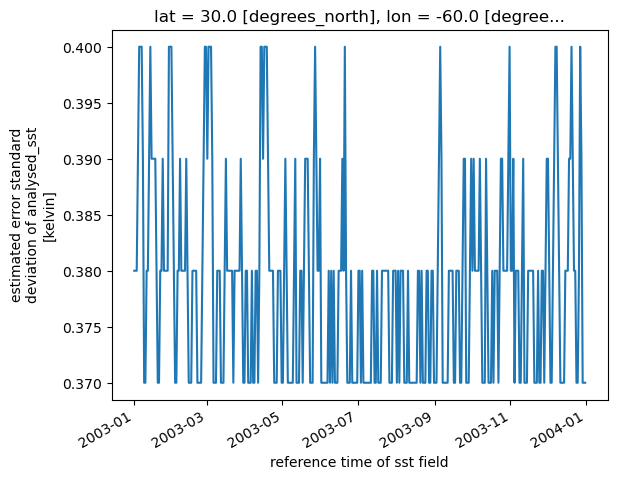

In [8]:
ds2003["analysis_error"].isel(lat=0, lon=0).plot()

In [11]:
ds = xr.open_mfdataset('/Volumes/Salmacis/mur/atlantic/202001*.nc4', combine='by_coords', parallel=True, engine='h5netcdf')
ds = ds.chunk({'time': 25})


<xarray.Dataset>
Dimensions:           (time: 31, lat: 1001, lon: 1001)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-01T09:00:00 ... 2020-01-3...
  * lat               (lat) float32 30.0 30.01 30.02 30.03 ... 39.98 39.99 40.0
  * lon               (lon) float32 -60.0 -59.99 -59.98 ... -50.02 -50.01 -50.0
Data variables:
    mask              (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                         CF-1.7
    title:                               Daily MUR SST, Final product
    summary:                             A merged, multi-sensor L4 Foundation...
    references:                          http://podaac.jpl.nasa.gov/Multi-sca...
    institution:                         Jet Propulsion Laboratory
    history:                             created at nominal 4-day latency; re...
    ...                                  ...
    build_dmrpp_metadata.build_dmrpp:    3.20.13-664
    build_dmrpp_metadata.bes:            3.20.13-664
    build_dmrpp_metadata.libdap:         libdap-3.20.11-198
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    build_dmrpp_metadata.invocation:     build_dmrpp -c /tmp/bes_conf_G6hu -f...
    history_json:                        [{"$schema":"https:\/\/harmony.earth...

In [12]:
ds.to_zarr('/Volumes/Salmacis/mur/test.zarr', mode='w', consolidated=True)

In [13]:
ds2 = xr.open_zarr('/Volumes/Salmacis/mur/test.zarr')
ds2

<xarray.Dataset>
Dimensions:           (time: 31, lat: 1001, lon: 1001)
Coordinates:
  * lat               (lat) float32 30.0 30.01 30.02 30.03 ... 39.98 39.99 40.0
  * lon               (lon) float32 -60.0 -59.99 -59.98 ... -50.02 -50.01 -50.0
  * time              (time) datetime64[ns] 2020-01-01T09:00:00 ... 2020-01-3...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                         CF-1.7
    Metadata_Conventions:                Unidata Observation Dataset v1.0
    acknowledgment:                      Please acknowledge the use of these ...
    build_dmrpp_metadata.bes:            3.20.13-664
    build_dmrpp_metadata.build_dmrpp:    3.20.13-664
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    ...                                  ...
    summary:                             A merged, multi-sensor L4 Foundation...
    time_coverage_end:                   20200101T210000Z
    time_coverage_start:                 20191231T210000Z
    title:                               Daily MUR SST, Final product
    uuid:                                27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:               -180.0

In [14]:
# loop over all years

dir = '/Volumes/Salmacis/mur/atlantic/'

for year in range(2002, 2021):
    filename = f'{dir}{year}*.nc4'
    ds = xr.open_mfdataset(filename, combine='by_coords', parallel=True, engine='h5netcdf')
    # Perform your desired operation on the dataset here
    ds = ds.chunk({'time': 25})
    fileout = f'{dir}atlantic_mur_{year}.zarr'
    ds.to_zarr(fileout, mode='w', consolidated=True)
    ds.close()
    print(f'{year} done')

2002 done
2003 done
2004 done
2005 done
2006 done
2007 done
2008 done
2009 done
2010 done
2011 done
2012 done
2013 done


/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[

2014 done


/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[

2015 done


OSError: Unable to synchronously open file (file signature not found)

In [29]:
ds0 = xr.open_zarr('/Volumes/Salmacis/mur/atlantic/atlantic_mur_2015.zarr')
ds0


<xarray.Dataset>
Dimensions:           (time: 365, lat: 1001, lon: 1001)
Coordinates:
  * lat               (lat) float32 30.0 30.01 30.02 30.03 ... 39.98 39.99 40.0
  * lon               (lon) float32 -60.0 -59.99 -59.98 ... -50.02 -50.01 -50.0
  * time              (time) datetime64[ns] 2015-01-01T09:00:00 ... 2015-12-3...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                         CF-1.5
    Metadata_Conventions:                Unidata Observation Dataset v1.0
    acknowledgment:                      Please acknowledge the use of these ...
    build_dmrpp_metadata.bes:            3.20.13-664
    build_dmrpp_metadata.build_dmrpp:    3.20.13-664
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    ...                                  ...
    summary:                             A merged, multi-sensor L4 Foundation...
    time_coverage_end:                   20150104T210000Z
    time_coverage_start:                 20150103T210000Z
    title:                               Daily MUR SST, Final product
    uuid:                                27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:               -180.0

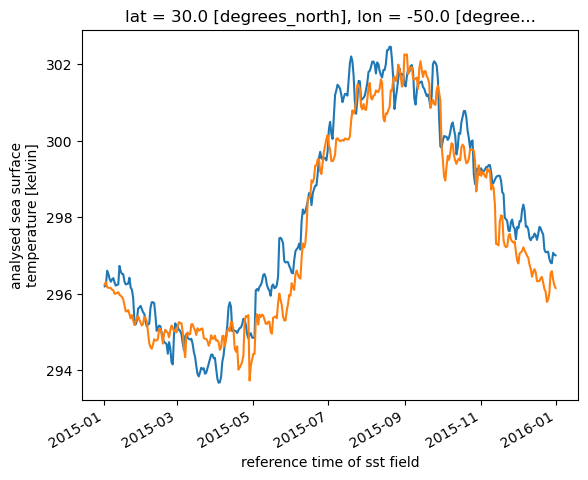

In [24]:
ds0["analysed_sst"].isel(lat=0, lon=0).plot()
ds0["analysed_sst"].isel(lat=0, lon=1000).plot()

In [26]:
dir = '/Volumes/Salmacis/mur/atlantic/'

for year in range(2017, 2023):
    filename = f'{dir}{year}*.nc4'
    ds = xr.open_mfdataset(filename, combine='by_coords', parallel=True, engine='h5netcdf')
    # Perform your desired operation on the dataset here
    ds = ds.chunk({'time': 25})
    fileout = f'{dir}atlantic_mur_{year}.zarr'
    ds.to_zarr(fileout, mode='w', consolidated=True)
    ds.close()
    print(f'{year} done')

/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[

2017 done
2018 done


/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[

2019 done
2020 done
2021 done
2022 done


In [39]:
dir = '/Volumes/Salmacis/mur/2016/'
year = 2016

filename = f'{dir}{year}*.nc4'
#ds = xr.open_mfdataset(filename, combine='by_coords', parallel=True, engine='h5netcdf', data_vars=['analysed_sst', 'analysis_error', 'lat', 'lon', 'time'])
ds = xr.open_mfdataset(filename, combine='by_coords', parallel=True, engine='h5netcdf')
ds = ds.chunk({'time': 25})
fileout = f'{dir}atlantic_mur_{year}.zarr'
ds.to_zarr(fileout, mode='w', consolidated=True)
ds.close()
print(f'{year} done')

/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[

2016 done


In [40]:
ds6 = xr.open_zarr('/Volumes/Salmacis/mur/2016/atlantic_mur_2016.zarr')
ds6

<xarray.Dataset>
Dimensions:           (time: 366, lat: 1001, lon: 1001)
Coordinates:
  * lat               (lat) float32 30.0 30.01 30.02 30.03 ... 39.98 39.99 40.0
  * lon               (lon) float32 -60.0 -59.99 -59.98 ... -50.02 -50.01 -50.0
  * time              (time) datetime64[ns] 2016-01-01T09:00:00 ... 2016-12-3...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                         CF-1.5
    Metadata_Conventions:                Unidata Observation Dataset v1.0
    acknowledgment:                      Please acknowledge the use of these ...
    build_dmrpp_metadata.bes:            3.20.13-664
    build_dmrpp_metadata.build_dmrpp:    3.20.13-664
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    ...                                  ...
    summary:                             A merged, multi-sensor L4 Foundation...
    time_coverage_end:                   20160101T210000Z
    time_coverage_start:                 20151231T210000Z
    title:                               Daily MUR SST, Final product
    uuid:                                27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:               -180.0

In [41]:
import numpy as np

# Get the time values from the dataset
time_values = ds6['time'].values

# Find the missing day
missing_day = np.setdiff1d(np.arange(np.min(time_values), np.max(time_values), np.timedelta64(1, 'D')), time_values)

missing_day

array([], dtype='datetime64[ns]')

In [53]:
import os

dir = '/Volumes/Salmacis/mur/'
dirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) and d.endswith('.zarr')]
dirs = sorted(dirs)
dirs = [dir + d for d in dirs]
dirs

['/Volumes/Salmacis/mur/atlantic_mur_2002.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2003.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2004.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2005.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2006.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2007.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2008.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2009.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2010.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2011.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2012.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2013.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2014.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2015.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2016.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2017.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2018.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2019.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2020.zarr',
 '/Volumes/Salmacis/mur/atlantic_mur_2021.zarr',
 '/Volumes/Salmacis/

In [54]:
ds = xr.open_mfdataset(dirs, combine='by_coords',engine='zarr')
ds

/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/usr/local/Caskroom/mambaforge/base/envs/swotdrift/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[

<xarray.Dataset>
Dimensions:           (lat: 1001, lon: 1001, time: 7458)
Coordinates:
  * lat               (lat) float32 30.0 30.01 30.02 30.03 ... 39.98 39.99 40.0
  * lon               (lon) float32 -60.0 -59.99 -59.98 ... -50.02 -50.01 -50.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2022-10-3...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(4257, 1001, 1001), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(4257, 1001, 1001), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                         CF-1.5
    Metadata_Conventions:                Unidata Observation Dataset v1.0
    acknowledgment:                      Please acknowledge the use of these ...
    build_dmrpp_metadata.bes:            3.20.13-664
    build_dmrpp_metadata.build_dmrpp:    3.20.13-664
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    ...                                  ...
    summary:                             A merged, multi-sensor L4 Foundation...
    time_coverage_end:                   20150104T210000Z
    time_coverage_start:                 20150103T210000Z
    title:                               Daily MUR SST, Final product
    uuid:                                27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:               -180.0

In [59]:
#ds["dt_1km_data"] = ds["dt_1km_data"].chunk({'time': 25})
#ds["sst_anomaly"] = ds["sst_anomaly"].chunk({'time': 25})
ds = ds.chunk({'time': 25})
ds

<xarray.Dataset>
Dimensions:           (lat: 1001, lon: 1001, time: 7458)
Coordinates:
  * lat               (lat) float32 30.0 30.01 30.02 30.03 ... 39.98 39.99 40.0
  * lon               (lon) float32 -60.0 -59.99 -59.98 ... -50.02 -50.01 -50.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2022-10-3...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                         CF-1.5
    Metadata_Conventions:                Unidata Observation Dataset v1.0
    acknowledgment:                      Please acknowledge the use of these ...
    build_dmrpp_metadata.bes:            3.20.13-664
    build_dmrpp_metadata.build_dmrpp:    3.20.13-664
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    ...                                  ...
    summary:                             A merged, multi-sensor L4 Foundation...
    time_coverage_end:                   20150104T210000Z
    time_coverage_start:                 20150103T210000Z
    title:                               Daily MUR SST, Final product
    uuid:                                27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:               -180.0

In [60]:
fileout = '/Volumes/Salmacis/mur/atlantic_mur_2002_2022.zarr'
ds.to_zarr(fileout, mode='w', consolidated=True)

In [61]:
del ds

In [62]:
ds = xr.open_zarr('/Volumes/Salmacis/mur/atlantic_mur_2002_2022.zarr')
ds

<xarray.Dataset>
Dimensions:           (time: 7458, lat: 1001, lon: 1001)
Coordinates:
  * lat               (lat) float32 30.0 30.01 30.02 30.03 ... 39.98 39.99 40.0
  * lon               (lon) float32 -60.0 -59.99 -59.98 ... -50.02 -50.01 -50.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2022-10-3...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(25, 1001, 1001), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                         CF-1.5
    Metadata_Conventions:                Unidata Observation Dataset v1.0
    acknowledgment:                      Please acknowledge the use of these ...
    build_dmrpp_metadata.bes:            3.20.13-664
    build_dmrpp_metadata.build_dmrpp:    3.20.13-664
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    ...                                  ...
    summary:                             A merged, multi-sensor L4 Foundation...
    time_coverage_end:                   20150104T210000Z
    time_coverage_start:                 20150103T210000Z
    title:                               Daily MUR SST, Final product
    uuid:                                27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:               -180.0

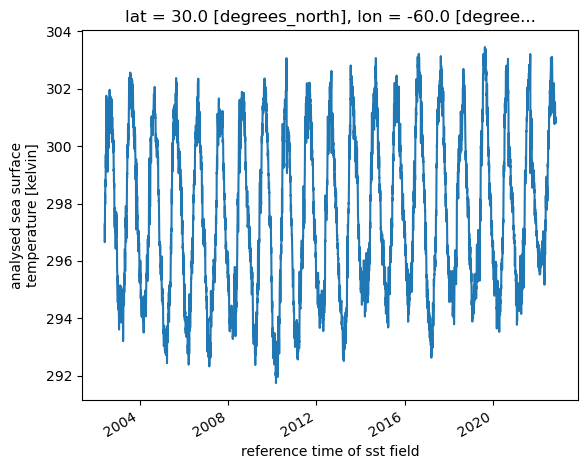

In [63]:
ds["analysed_sst"].isel(lat=0, lon=0).plot()

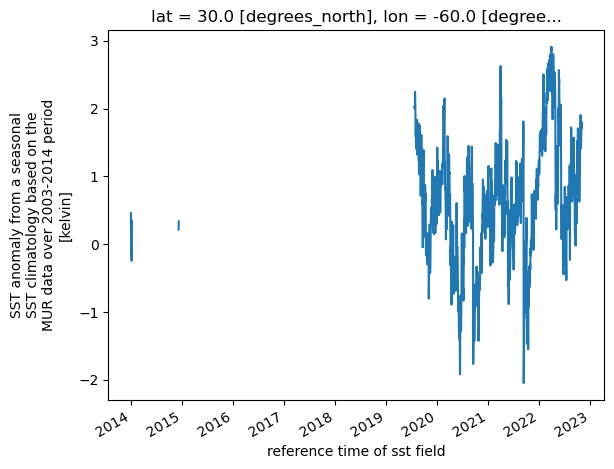

In [64]:
ds["sst_anomaly"].isel(lat=0, lon=0).plot()


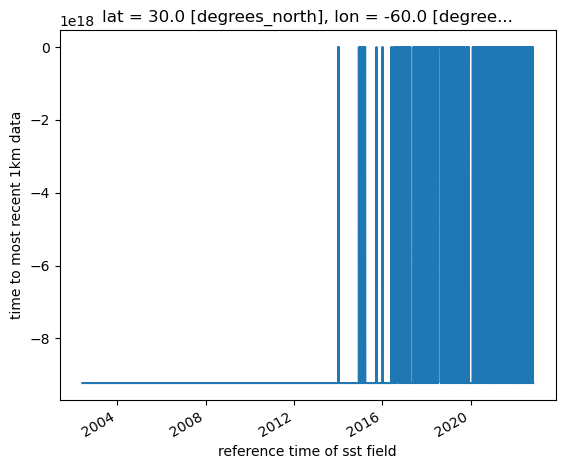

In [65]:
ds["dt_1km_data"].isel(lat=0, lon=0).plot()

In [66]:
ds["dt_1km_data"][0,0,0].values

numpy.timedelta64('NaT','ns')